# Time Series Classification - Comparison

### Giada Confortola & Batuhan Tüter 
### AIM3 - Scalable Data Science | WiSe 30.11.2018 


In [162]:
import tslearn as ts
import pandas as pd
import numpy as np
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline

from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.datasets import CachedDatasets
from tslearn.shapelets import ShapeletModel
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col52,col53,col54,col55,col56,col57,col58,col59,col60,label
0,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,-0.657800,1.446077,-0.846397,...,-1.568165,1.021863,-1.429748,1.356966,1.372781,0.663558,0.918346,-1.311742,-1.197146,1
1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,0.956898,-1.216140,-0.588536,...,-0.802528,-1.121287,0.989319,-1.109687,0.219856,0.630034,1.398140,0.085742,0.024997,1
2,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,1.168600,-1.703254,0.972810,...,-0.762884,1.382972,-0.869103,1.277252,-0.198967,0.966809,0.666129,0.106996,0.082715,1
3,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,0.902108,-0.218132,-1.430721,...,-1.499604,0.406744,1.289153,-1.119731,-0.995985,1.651135,-1.187098,0.025463,-0.841518,1
4,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,1.667339,-0.206153,-1.376627,...,1.029995,-1.496161,-1.167442,1.484208,-0.373020,-0.843281,-0.209794,0.137724,0.716542,1


In [3]:
y_train = np.array(train['label'])
X_train = np.array(train.drop(columns='label', axis=0))

In [4]:
y_test = np.array(test['label'])
X_test = np.array(test.drop(columns='label', axis=0))
X_test.shape

(300, 60)

## Visualization

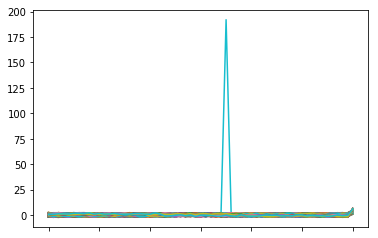

In [5]:
train.T.plot(legend=None)

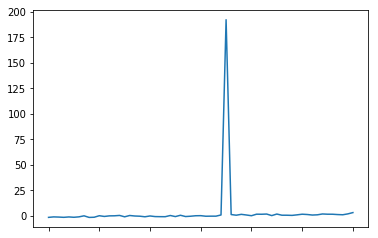

In [6]:
train.iloc[139].plot()

In [7]:
train.drop(train.index[139], inplace=True)

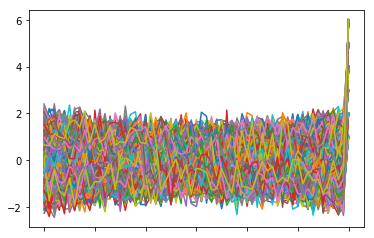

In [68]:
train.T.plot(legend=None)

In [64]:
label_sets = {}
label_sets['1'] = train[train['label']==1].iloc[:,0:-1]
label_sets['2'] = train[train['label']==2].iloc[:,0:-1]
label_sets['3'] = train[train['label']==3].iloc[:,0:-1]
label_sets['4'] = train[train['label']==4].iloc[:,0:-1]
label_sets['5'] = train[train['label']==5].iloc[:,0:-1]
label_sets['6'] = train[train['label']==6].iloc[:,0:-1]

sums = {}
for key in label_sets:
    sums[key] = label_sets[key].iloc[:,1:].sum(axis=0) / label_sets[key].shape[0]

In [10]:
days = [ r for r in range(sums['1'].shape[0])]
def plot_with_fft(key):
    fig = plt.figure(1,figsize=[15,10])
    plt.title(key)
    plt.plot(sums[key],label = key )
    plt.show()

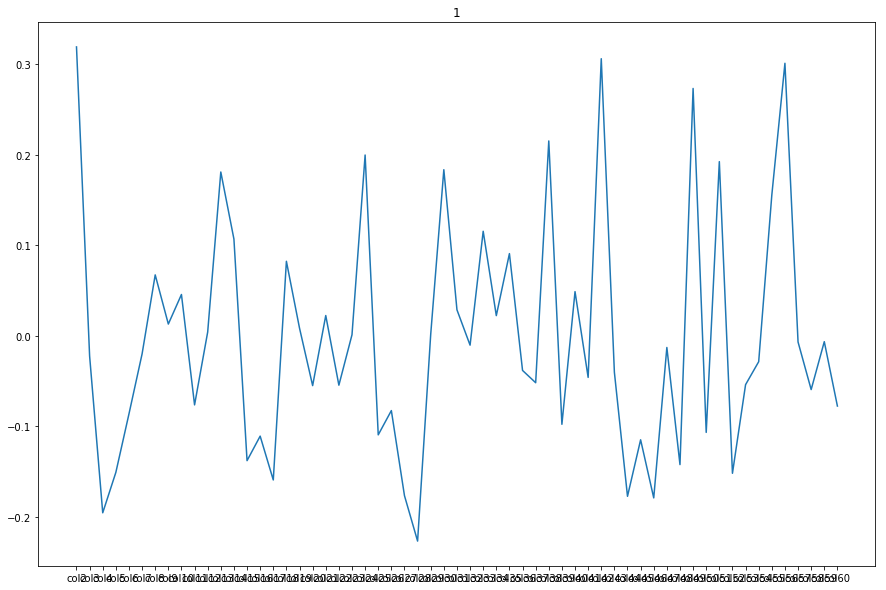

In [11]:
plot_with_fft('1')

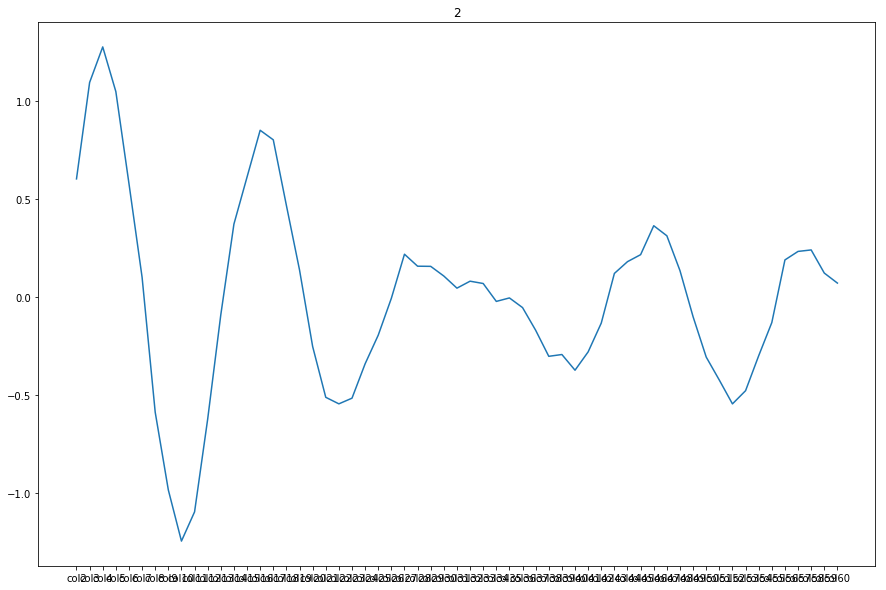

In [12]:
plot_with_fft('2')

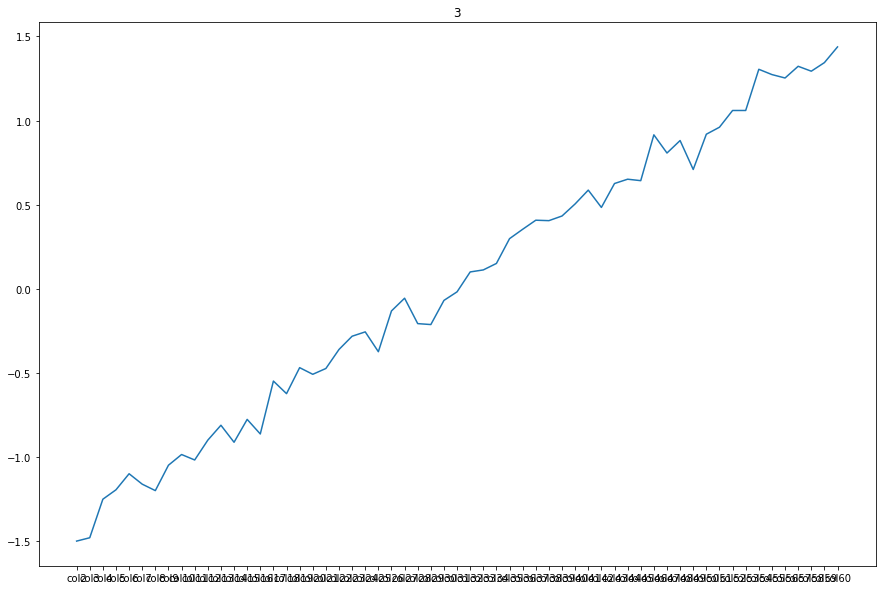

In [13]:
plot_with_fft('3')

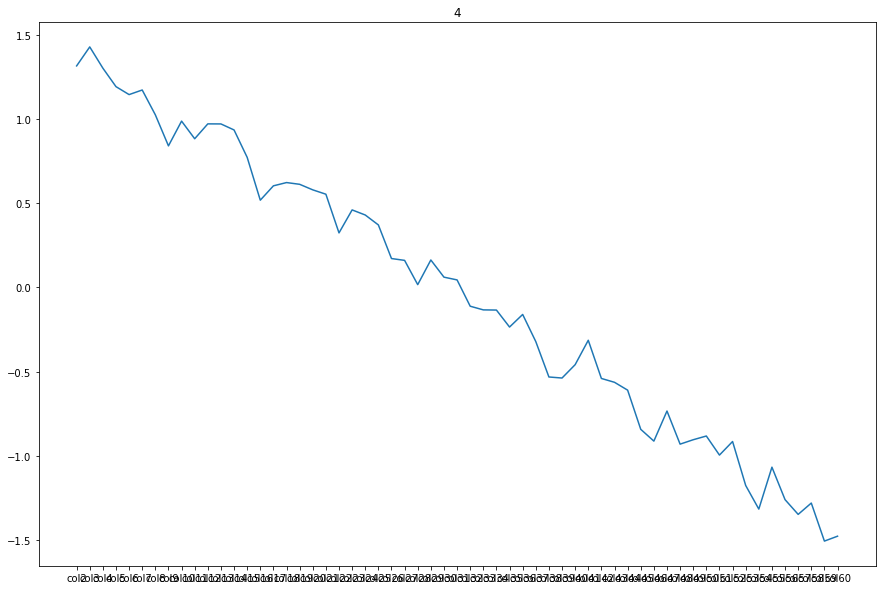

In [14]:
plot_with_fft('4')

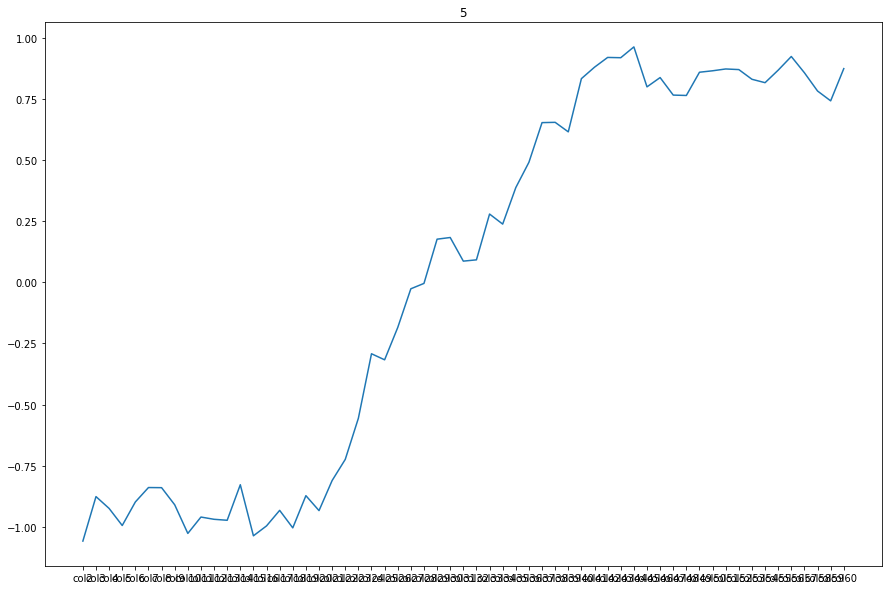

In [15]:
plot_with_fft('5')

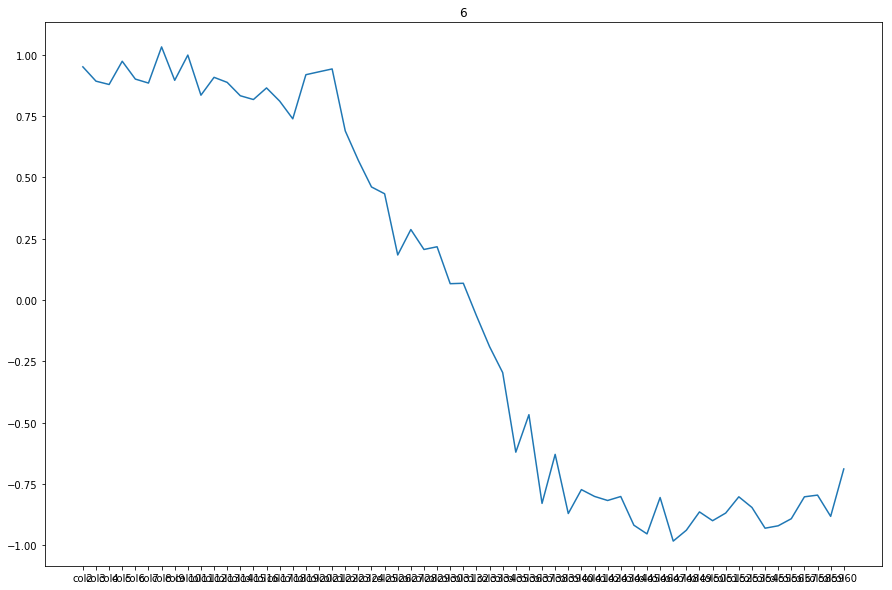

In [16]:
plot_with_fft('6')

In [17]:
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

## Building a model

### KNN with Euclidean Distance

In [18]:
start_fit_knn_ed = time.time()
knn_ed = KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric='euclidean')
knn_ed.fit(X_train, y_train)
end_fit_knn_ed = time.time()

In [19]:
start_predict_knn_ed = time.time()
y_pred_knn_ed = knn_ed.predict(X_test)
end_predict_knn_ed = time.time()
y_pred_knn_ed

array([3, 3, 2, 4, 4, 3, 3, 3, 2, 3, 4, 4, 4, 1, 3, 3, 4, 3, 1, 2, 4, 4,
       3, 4, 2, 3, 3, 4, 6, 3, 2, 3, 6, 2, 3, 1, 3, 4, 3, 3, 4, 3, 2, 4,
       1, 2, 6, 3, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5,
       5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6,
       4, 4, 6, 6, 6, 6, 6, 6, 4, 4, 6, 4, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6,
       6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 6])

In [51]:
knn_fit_time_ed = (end_fit_knn_ed - start_fit_knn_ed)
knn_predict_time_ed = (end_predict_knn_ed - start_predict_knn_ed) 
knn_time_ed = knn_fit_time_ed + knn_predict_time_ed

In [52]:
print "Time to fit 1-NN Classifier with Euclidean Distance: ", knn_fit_time_ed
print "Time to predict 1-NN Classifier with Euclidean Distance: ", knn_predict_time_ed
print "Total Time of 1-NN Classifier with Euclidean Distance: ", knn_time_ed

Time to fit 1-NN Classifier with Euclidean Distance:  0.0228309631348
Time to predict 1-NN Classifier with Euclidean Distance:  0.0419018268585
Total Time of 1-NN Classifier with Euclidean Distance:  0.0647327899933


In [31]:
print("Correct classification rate:", knn_ed.score(X_test, y_test))

('Correct classification rate:', 0.77)


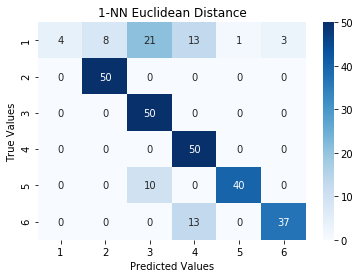

In [115]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_knn_ed, labels=[1,2,3,4,5,6]),xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6], annot=True, cmap="Blues").set_title('1-NN Euclidean Distance')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show(ax)

### KNN with Dynamic Time Warping

In [24]:
start_fit_knn = time.time()
knn = KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric='dtw')
knn.fit(X_train, y_train)
end_fit_knn = time.time()

In [ ]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric='dtw')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [25]:
start_predict_knn = time.time()
y_pred_knn = knn.predict(X_test)
end_predict_knn = time.time()
y_pred_knn

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6])

In [69]:
knn_fit_time = (end_fit_knn - start_fit_knn)
knn_predict_time = (end_predict_knn - start_predict_knn) 
knn_time = knn_fit_time + knn_predict_time

In [70]:
print "Time to fit 1-NN Classifier DTW: ", knn_fit_time
print "Time to predict 1-NN Classifier with DTW: ", knn_predict_time
print "Total Time of 1-NN Classifier with DTW: ", knn_time

Time to fit 1-NN Classifier DTW:  0.0116128921509
Time to predict 1-NN Classifier with DTW:  267.438199043
Total Time of 1-NN Classifier with DTW:  267.449811935


In [28]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [29]:
print("Correct classification rate:", knn.score(X_test, y_test))

('Correct classification rate:', 0.96)


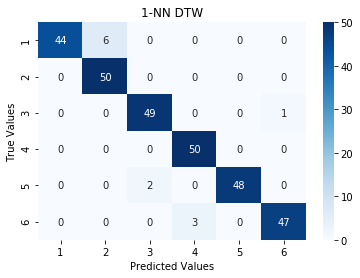

In [117]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_knn, labels=[1,2,3,4,5,6]),xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6], annot=True, cmap="Blues").set_title('1-NN DTW')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show(ax)

### Shapelet (5 shapelets, length 5)

In [199]:
start_fit_st = time.time()
sl = ShapeletModel(n_shapelets_per_size={5:5}, max_iter=10000, verbose_level=0)
sl.fit(X_train, y_train)
end_fit_st = time.time()

In [200]:
start_predict_st = time.time()
y_pred_st = sl.predict(X_test)
end_predict_st = time.time()

In [201]:
st_fit_time = end_fit_st - start_fit_st
st_predict_time = end_predict_st - start_predict_st
st_time = st_fit_time + st_predict_time

In [202]:
print "Time to fit Shapelet Classifier: ", st_fit_time
print "Time to predict Shapelet Classifier: ", st_predict_time
print "Total Time for Shapelet Classifier: ", st_time

Time to fit Shapelet Classifier:  142.258734941
Time to predict Shapelet Classifier:  0.320674180984
Total Time for Shapelet Classifier:  142.579409122


In [203]:
y_pred_st

array([1, 4, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 5, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 4, 1, 5, 1, 4, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 5, 5, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 6, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [204]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [205]:
print("Correct classification rate:", sl.score(X_test, y_test))

('Correct classification rate:', 0.43)


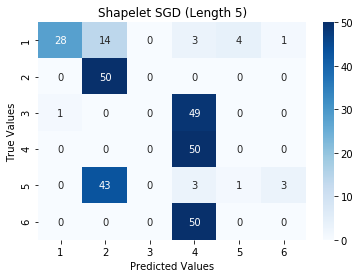

In [222]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_st, labels=[1,2,3,4,5,6]),xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6], annot=True, cmap="Blues").set_title('Shapelet SGD (Length 5)')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show(ax)

### Shapelets (5 shapelets with length 10)

In [214]:
start_fit_st_2 = time.time()
sl_2 = ShapeletModel(n_shapelets_per_size={10:5}, max_iter=10000, verbose_level=0)
sl_2.fit(X_train, y_train)
end_fit_st_2 = time.time()

In [215]:
start_predict_st_2 = time.time()
y_pred_st_2 = sl_2.predict(X_test)
end_predict_st_2 = time.time()

In [216]:
st_fit_time_2 = end_fit_st_2 - start_fit_st_2
st_predict_time_2 = end_predict_st_2 - start_predict_st_2
st_2_time = st_fit_time_2 + st_predict_time_2

In [223]:
print "Time to fit Shapelet Classifier (5 shapelets, length 10): ", st_fit_time_2
print "Time to predict Shapelet Classifier (5 shapelets, length 10): ", st_predict_time_2
print "Total Time for  Shapelet Classifier (5 shapelets, length 10): ", st_2_time

Time to fit Shapelet Classifier (5 shapelets, length 10):  136.632470131
Time to predict Shapelet Classifier (5 shapelets, length 10):  0.518286943436
Total Time for  Shapelet Classifier (5 shapelets, length 10):  137.150757074


In [218]:
y_pred_st_2

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 6, 4, 4, 6, 4, 3, 6, 6, 6,
       3, 4, 3, 3, 6, 4, 6, 3, 6, 3, 6, 6, 6, 3, 1, 3, 6, 3, 6, 4, 6, 6,
       6, 4, 3, 3, 4, 4, 6, 4, 6, 3, 1, 6, 3, 4, 4, 3, 4, 3, 4, 6, 6, 4,
       6, 6, 6, 6, 4, 6, 6, 3, 6, 6, 3, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 1, 4, 4, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 4, 4, 6, 4,
       6, 6, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5,
       1, 6, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 6, 6, 3, 6, 6, 6, 6, 6, 4, 6, 6,
       6, 4, 6, 6, 6, 6, 6, 6, 3, 3, 6, 6, 4, 3, 4, 6, 6, 6, 3, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6])

In [219]:
print("Correct classification rate:", sl_2.score(X_test, y_test))

('Correct classification rate:', 0.68)


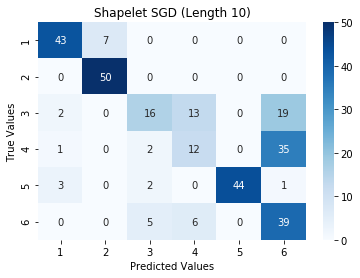

In [224]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_st_2, labels=[1,2,3,4,5,6]),xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6], annot=True, cmap="Blues").set_title('Shapelet SGD (Length 10)')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show(ax)

### Definite Kernel - SVC

In [74]:
start_fit_svc = time.time()
svc = TimeSeriesSVC(kernel='gak', gamma='auto', sz=X_train.shape[1], d=X_train.shape[2])
svc.fit(X_train, y_train)
end_fit_svc = time.time()

In [ ]:
svc = TimeSeriesSVC(kernel='gak', gamma='auto', sz=X_train.shape[1], d=X_train.shape[2])
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [75]:
start_predict_svc = time.time()
y_pred_svc = svc.predict(X_test)
end_predict_svc = time.time()

In [76]:
svc_fit_time = end_fit_svc - start_fit_svc
svc_predict_time = end_predict_svc - start_predict_svc
svc_time = svc_fit_time + svc_predict_time

In [77]:
print "Time to fit Shapelet Classifier ", svc_fit_time 
print "Time to predict Shapelet Classifier ", svc_predict_time
print "Time to predict Shapelet Classifier ", svc_time

Time to fit Shapelet Classifier  21.7137010098
Time to predict Shapelet Classifier  23.2349019051
Time to predict Shapelet Classifier  44.9486029148


In [78]:
y_pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [79]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [80]:
print("Correct classification rate:", svc.score(X_test, y_test))

('Correct classification rate:', 0.98)


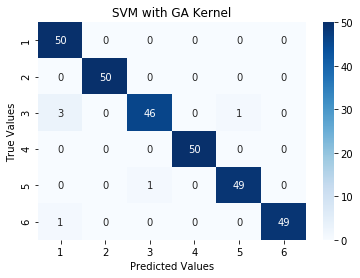

In [123]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred_svc, labels=[1,2,3,4,5,6]),xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6], annot=True, cmap="Blues").set_title('SVM with GA Kernel')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show(ax)

## Comparison

In [225]:
knn_acc_ed = accuracy_score(y_test, y_pred_knn_ed)
print "Correct classification rate of 1-NN with Euclidean Distance:", knn_acc_ed

Correct classification rate of 1-NN with Euclidean Distance: 0.77


In [226]:
knn_acc = accuracy_score(y_test, y_pred_knn)
print "Correct classification rate of 1-NN with Dynamic Time Warping:", knn_acc

Correct classification rate of 1-NN with Dynamic Time Warping: 0.96


In [227]:
sl_acc = accuracy_score(y_test, y_pred_st)
print "Correct classification rate of Shapelet Model:", sl_acc

Correct classification rate of Shapelet Model: 0.43


In [228]:
sl_2_acc = accuracy_score(y_test, y_pred_st_2)
print "Correct classification rate of Shapelet Model:", sl_2_acc

Correct classification rate of Shapelet Model: 0.68


In [229]:
svc_acc = accuracy_score(y_test, y_pred_svc)
print "Correct classification rate of SVC with Global Alignment Kernel:", svc_acc

Correct classification rate of SVC with Global Alignment Kernel: 0.98


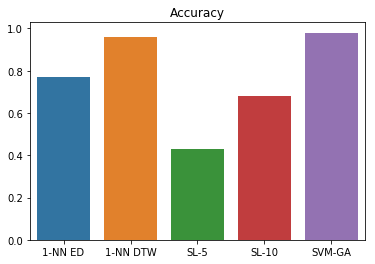

In [230]:
accuracy = sns.barplot(x =['1-NN ED','1-NN DTW','SL-5', 'SL-10', 'SVM-GA'], y=[knn_acc_ed, knn_acc,sl_acc,sl_2_acc,svc_acc]).set_title('Accuracy')

In [128]:
knn_p, knn_r, knn_fscore ,_ = precision_recall_fscore_support(y_test, y_pred_knn)

In [129]:
st_p, st_r, st_fscore ,_ =  precision_recall_fscore_support(y_test, y_pred_st)

In [90]:
svc_p, svc_r, svc_fscore ,_ = precision_recall_fscore_support(y_test, y_pred_svc)

### Precision per Class

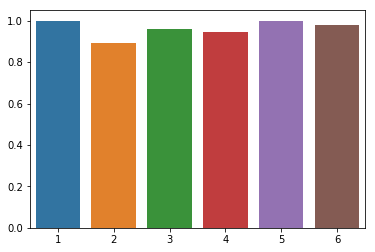

In [56]:
sns.barplot(x =[1,2,3,4,5,6], y=knn_p)

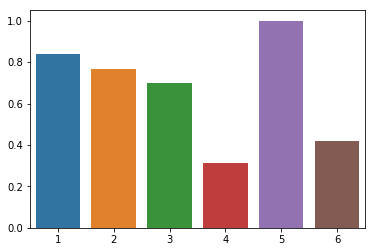

In [57]:
sns.barplot(x =[1,2,3,4,5,6], y=st_p)

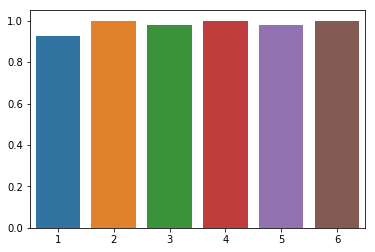

In [58]:
sns.barplot(x =[1,2,3,4,5,6], y=svc_p)

### Recall per Class

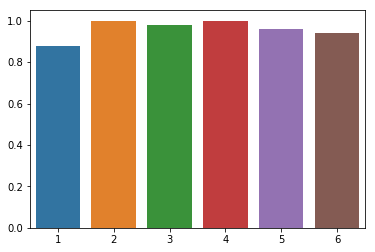

In [59]:
sns.barplot(x =[1,2,3,4,5,6], y=knn_r)

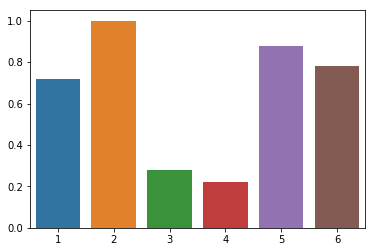

In [60]:
sns.barplot(x =[1,2,3,4,5,6], y=st_r)

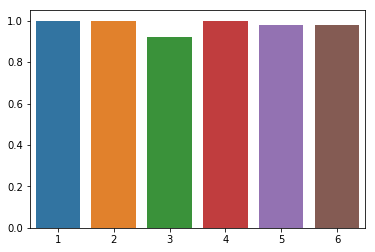

In [61]:
sns.barplot(x =[1,2,3,4,5,6], y=svc_r)

### F-Score Per Class

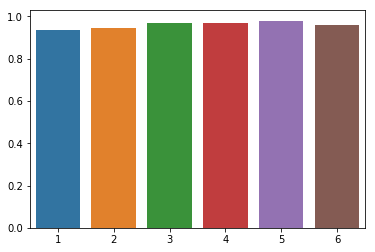

In [63]:
sns.barplot(x =[1,2,3,4,5,6], y=knn_fscore)

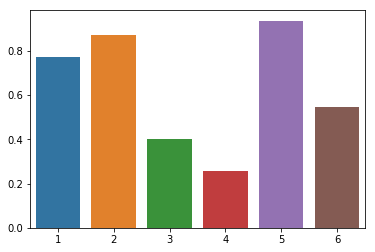

In [64]:
sns.barplot(x =[1,2,3,4,5,6], y=st_fscore)

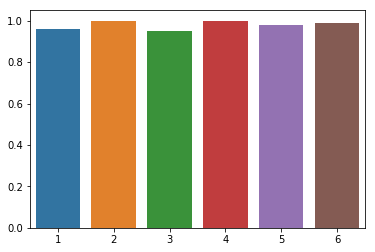

In [65]:
sns.barplot(x =[1,2,3,4,5,6], y=svc_fscore)

## Time Comparison

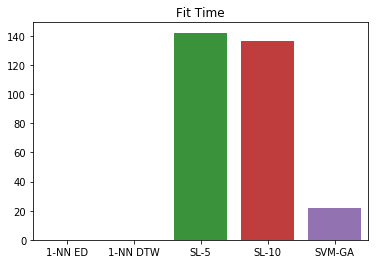

In [231]:
fit_time = sns.barplot(x =['1-NN ED','1-NN DTW','SL-5', 'SL-10', 'SVM-GA'], y=[knn_fit_time_ed,knn_fit_time,st_fit_time,st_fit_time_2,svc_fit_time]).set_title('Fit Time')

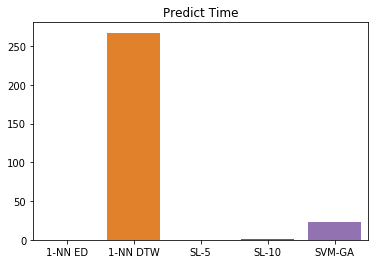

In [232]:
fit_time = sns.barplot(x =['1-NN ED','1-NN DTW','SL-5', 'SL-10', 'SVM-GA'], y=[knn_predict_time_ed, knn_predict_time,st_predict_time,st_predict_time_2,svc_predict_time]).set_title('Predict Time')

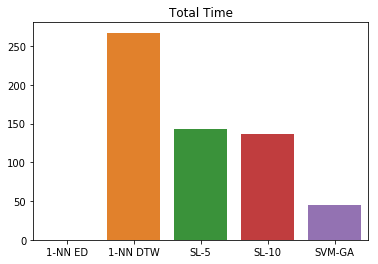

In [233]:
fit_time = sns.barplot(x =['1-NN ED','1-NN DTW','SL-5', 'SL-10', 'SVM-GA'], y=[knn_time_ed, knn_time,st_time,st_2_time,svc_time]).set_title('Total Time')